In [2]:
%run _init_.py

C:\Users\m\4차4차\speed\ml\_init_.py:26: SyntaxWarning: invalid escape sequence '\W'
  font_path = "c:\Windows\Fonts\malgun.ttf"


pandas: pd 2.2.2
numpy : np 2.1.0
matplotlib : mpl 3.9.2
seaborn : sns 0.13.2
sklearn : skl 1.5.1


### 준비

In [3]:
df = pd.read_csv('mlst2.csv')

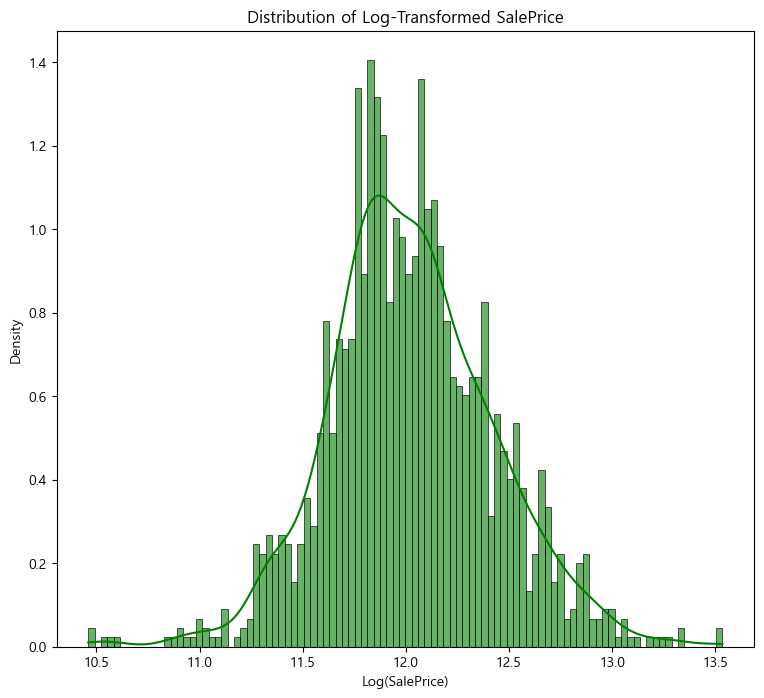

In [4]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 로그 변환 적용 (0이 포함된 경우를 고려하여 1을 더함)
df['SalePrice_log'] = np.log1p(df['SalePrice'])

# 로그 변환된 데이터의 분포 시각화
plt.figure(figsize=(9, 8))
sns.histplot(df['SalePrice_log'], color='g', bins=100, kde=True, stat='density', alpha=0.6)
plt.xlabel('Log(SalePrice)')
plt.title('Distribution of Log-Transformed SalePrice')
plt.show()


In [6]:
import pandas as pd

def get_significant_columns(dfs03, threshold=0.6):

    # 상관관계 계산
    corr = dfs03.corr()
    
    # 'SalePrice'와의 상관관계만 필터링
    corr_saleprice = corr[['SalePrice']]
    
    # 'SalePrice'를 제외한 열만 필터링
    corr_saleprice_excluding = corr_saleprice.drop('SalePrice')
    
    # 절대값이 threshold 이상인 상관계수 필터링
    significant_corr = corr_saleprice_excluding[abs(corr_saleprice_excluding['SalePrice']) >= threshold]
    
    # 상관계수가 임계값 이상인 열들의 리스트 반환
    significant_columns = significant_corr.index.tolist()
    return significant_columns

def save_significant_columns_to_csv(dfs03, threshold=0.5, filename='over05.csv'):
 
    # 상관계수가 임계값 이상인 열들의 리스트 가져오기
    significant_columns = get_significant_columns(dfs03, threshold)
    
    # 'SalePrice' 열을 포함한 열 리스트 생성
    selected_columns = significant_columns + ['SalePrice']
    
    # 데이터프레임에서 선택된 열만 추출
    over05 = dfs03[selected_columns]
    
    # 새로운 데이터프레임을 CSV 파일로 저장
    over05.to_csv(filename, index=False)
    
    print(f"CSV 파일로 저장 완료! 파일명: {filename}")

# 예제 사용법
# df = pd.read_csv('your_data.csv')  # 데이터프레임 로드
# save_significant_columns_to_csv(df, threshold=0.5, filename='over05.csv')


In [7]:
import numpy as np
import pandas as pd

# 로그 변환 적용 (0이 포함된 경우를 고려하여 1을 더함)
df['SalePrice_log'] = np.log1p(df['SalePrice'])

# SalePrice 열 제거
df = df.drop('SalePrice', axis=1)



In [9]:
import pandas as pd

# 결측값이 있는 열에 대해 처리
df['BsmtQual'] = df['BsmtQual'].fillna('0')  # BsmtQual의 결측값을 '0'으로 채움
df['GarageFinish'] = df['GarageFinish'].fillna('0')  # GarageFinish의 결측값을 '0'으로 채움

# 나머지 열에 대해 결측값이 있는 행 삭제
# 결측값을 처리한 후에 'TotalBsmtSF', 'KitchenQual', 'GarageCars', 'GarageArea' 열에서 결측값이 있는 행 삭제
ml = df.dropna(subset=['TotalBsmtSF', 'KitchenQual', 'GarageCars', 'GarageArea'])

# 결과 확인
print(f"원본 데이터프레임의 행 수: {df.shape[0]}")
print(f"결측값 처리 후 데이터프레임의 행 수: {ml.shape[0]}")


원본 데이터프레임의 행 수: 1459


In [10]:

# 변환된 SalePrice_log 열이 데이터프레임에 포함된 상태로 확인
ml.head()

,OverallQual,YearBuilt,YearRemodAdd,ExterQual,BsmtQual,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,KitchenQual,TotRmsAbvGrd,GarageFinish,GarageCars,GarageArea,SalePrice_log
0,7,2003,2003,3,3.0,856,856,1710,2,2,8,2.0,2,548,12.247699
1,6,1976,1976,1,3.0,1262,1262,1262,2,1,6,2.0,2,460,12.109016
2,7,2001,2002,3,3.0,920,920,1786,2,2,6,2.0,2,608,12.317171
3,7,1915,1970,1,2.0,756,961,1717,1,2,7,1.0,3,642,11.849405
4,8,2000,2000,3,3.0,1145,1145,2198,2,2,9,2.0,3,836,12.429220


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   OverallQual    2919 non-null   int64  
 1   YearBuilt      2919 non-null   int64  
 2   YearRemodAdd   2919 non-null   int64  
 3   ExterQual      2919 non-null   int64  
 4   BsmtQual       2838 non-null   float64
 5   TotalBsmtSF    2918 non-null   float64
 6   1stFlrSF       2919 non-null   int64  
 7   GrLivArea      2919 non-null   int64  
 8   FullBath       2919 non-null   int64  
 9   KitchenQual    2918 non-null   float64
 10  TotRmsAbvGrd   2919 non-null   int64  
 11  GarageFinish   2760 non-null   float64
 12  GarageCars     2918 non-null   float64
 13  GarageArea     2918 non-null   float64
 14  SalePrice_log  2919 non-null   float64
dtypes: float64(7), int64(8)
memory usage: 342.2 KB


### 랜덤 포레스트

In [11]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# 데이터 준비
X = ml.drop(columns=['SalePrice_log'])
y = ml['SalePrice_log']

# 데이터 분리 (80% 훈련, 20% 테스트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 스케일러 적용 (StandardScaler)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 랜덤 포레스트 하이퍼파라미터 그리드 설정
param_distributions = {
    'n_estimators': np.arange(100, 3000, 100),
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'] 
}

# RandomizedSearchCV 객체 생성
random_search = RandomizedSearchCV(
    RandomForestRegressor(random_state=42),
    param_distributions=param_distributions,
    n_iter=50,
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# RandomizedSearchCV 학습
random_search.fit(X_train_scaled, y_train)

# 최적의 하이퍼파라미터 출력
print(f"Best parameters: {random_search.best_params_}")

# 최적의 모델로 예측
best_model = random_search.best_estimator_
y_train_pred = best_model.predict(X_train_scaled)
y_test_pred = best_model.predict(X_test_scaled)

# 성능 평가 (Root Mean Squared Error 계산)
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Training RMSE: {rmse_train}")
print(f"Test RMSE: {rmse_test}")
print(f"Training R^2 Score: {r2_train}")
print(f"Test R^2 Score: {r2_test}")


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters: {'n_estimators': np.int64(1300), 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None}
Training RMSE: 0.10101897327786087
Test RMSE: 0.1590387603094557
Training R^2 Score: 0.9352472510786048
Test R^2 Score: 0.8488134811038346


c:\Users\m\miniconda3\envs\ml\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\m\miniconda3\envs\ml\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [48]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# 데이터 준비
X = ml.drop(columns=['SalePrice'])
y = ml['SalePrice']

# 데이터 분리 (80% 훈련, 20% 테스트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 스케일러 적용 (StandardScaler)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 랜덤 포레스트 하이퍼파라미터 그리드 설정
param_distributions = {
    'n_estimators': np.arange(1200),
    'max_depth': [10],
    'min_samples_split': [5],
    'min_samples_leaf': [4],
    'max_features': ['sqrt'] 
}

# RandomizedSearchCV 객체 생성
random_search = RandomizedSearchCV(
    RandomForestRegressor(random_state=42),
    param_distributions=param_distributions,
    n_iter=50,
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# RandomizedSearchCV 학습
random_search.fit(X_train_scaled, y_train)

# 최적의 하이퍼파라미터 출력
print(f"Best parameters: {random_search.best_params_}")

# 최적의 모델로 예측
best_model = random_search.best_estimator_
y_train_pred = best_model.predict(X_train_scaled)
y_test_pred = best_model.predict(X_test_scaled)

# 성능 평가 (Root Mean Squared Error 계산)
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Training RMSE: {rmse_train}")
print(f"Test RMSE: {rmse_test}")
print(f"Training R^2 Score: {r2_train}")
print(f"Test R^2 Score: {r2_test}")


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters: {'n_estimators': np.int64(1108), 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 10}
Training RMSE: 32730.76592449252
Test RMSE: 43295.14693270064
Training R^2 Score: 0.6658411679181522
Test R^2 Score: 0.4860269544062922


c:\Users\m\miniconda3\envs\ml\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\m\miniconda3\envs\ml\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### 그레디언트 부스팅

In [49]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np

# 데이터 준비
X = ml.drop(columns=['SalePrice'])
y = ml['SalePrice']

# 데이터 분리 (80% 훈련, 20% 테스트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 스케일러 적용 (StandardScaler)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 그레디언트 부스팅 하이퍼파라미터 그리드 설정
param_distributions = {
    'n_estimators': np.arange(100, 2000, 100),
    'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3],
    'max_depth': [3, 4, 5, 6, 7, 8],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0]
}

# RandomizedSearchCV 객체 생성
random_search = RandomizedSearchCV(
    GradientBoostingRegressor(random_state=42),
    param_distributions=param_distributions,
    n_iter=50,
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# RandomizedSearchCV 학습
random_search.fit(X_train_scaled, y_train)

# 최적의 하이퍼파라미터 출력
print(f"Best parameters: {random_search.best_params_}")

# 최적의 모델로 예측
best_model = random_search.best_estimator_

# 훈련 데이터와 테스트 데이터에 대한 예측
y_train_pred = best_model.predict(X_train_scaled)
y_test_pred = best_model.predict(X_test_scaled)

# 성능 평가
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Train RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")
print(f"Train R^2 Score: {train_r2}")
print(f"Test R^2 Score: {test_r2}")


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters: {'subsample': 0.9, 'n_estimators': np.int64(800), 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 3, 'learning_rate': 0.01}
Train RMSE: 32274.565970000647
Test RMSE: 43006.01682142777
Train R^2 Score: 0.6750912337902968
Test R^2 Score: 0.49286877817614794


c:\Users\m\miniconda3\envs\ml\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\m\miniconda3\envs\ml\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [18]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np

# 데이터 준비
X = df.drop(columns=['SalePrice_log'])
y = df['SalePrice_log']

# 데이터 분리 (80% 훈련, 20% 테스트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 스케일러 적용 (StandardScaler)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 그레디언트 부스팅 하이퍼파라미터 그리드 설정
param_distributions = {
    'n_estimators': np.arange(900),
    'learning_rate': [0.01],
    'max_depth': [3],
    'min_samples_split': [2],
    'min_samples_leaf': [4],
    'subsample': [0.9]
}

# RandomizedSearchCV 객체 생성
random_search = RandomizedSearchCV(
    GradientBoostingRegressor(random_state=42),
    param_distributions=param_distributions,
    n_iter=50,
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# RandomizedSearchCV 학습
random_search.fit(X_train_scaled, y_train)

# 최적의 하이퍼파라미터 출력
print(f"Best parameters: {random_search.best_params_}")

# 최적의 모델로 예측
best_model = random_search.best_estimator_

# 훈련 데이터와 테스트 데이터에 대한 예측
y_train_pred = best_model.predict(X_train_scaled)
y_test_pred = best_model.predict(X_test_scaled)

# 성능 평가
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Train RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")
print(f"Train R^2 Score: {train_r2}")
print(f"Test R^2 Score: {test_r2}")


Fitting 5 folds for each of 50 candidates, totalling 250 fits


ValueError: 
All the 250 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
250 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\m\miniconda3\envs\ml\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\m\miniconda3\envs\ml\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\m\miniconda3\envs\ml\Lib\site-packages\sklearn\ensemble\_gb.py", line 659, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\m\miniconda3\envs\ml\Lib\site-packages\sklearn\base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\m\miniconda3\envs\ml\Lib\site-packages\sklearn\utils\validation.py", line 1301, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "c:\Users\m\miniconda3\envs\ml\Lib\site-packages\sklearn\utils\validation.py", line 1064, in check_array
    _assert_all_finite(
  File "c:\Users\m\miniconda3\envs\ml\Lib\site-packages\sklearn\utils\validation.py", line 123, in _assert_all_finite
    _assert_all_finite_element_wise(
  File "c:\Users\m\miniconda3\envs\ml\Lib\site-packages\sklearn\utils\validation.py", line 172, in _assert_all_finite_element_wise
    raise ValueError(msg_err)
ValueError: Input X contains NaN.
GradientBoostingRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values


### XGboosting 모델

In [15]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np

# 데이터 준비
X = df.drop(columns=['SalePrice'])
y = df['SalePrice']

# 데이터 분리 (80% 훈련, 20% 테스트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 스케일러 적용 (StandardScaler)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# XGBoost 하이퍼파라미터 그리드 설정
param_distributions = {
    'n_estimators': np.arange(100, 2000, 100),
    'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3],
    'max_depth': [3, 4, 5, 6, 7, 8],
    'min_child_weight': [1, 2, 4, 6],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# RandomizedSearchCV 객체 생성
random_search = RandomizedSearchCV(
    xgb.XGBRegressor(objective='reg:squarederror', random_state=42),
    param_distributions=param_distributions,
    n_iter=50,
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# RandomizedSearchCV 학습
random_search.fit(X_train_scaled, y_train)

# 최적의 하이퍼파라미터 출력
print(f"Best parameters: {random_search.best_params_}")

# 최적의 모델로 예측
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

# 성능 평가
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R^2 Score: {r2}")


KeyError: "['SalePrice'] not found in axis"

### LightGBM 회귀 모델

In [43]:
import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np

# 데이터 준비
X = top20.drop(columns=['SalePrice'])
y = top20['SalePrice']

# 데이터 분리 (80% 훈련, 20% 테스트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 스케일러 적용 (StandardScaler)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# LightGBM 하이퍼파라미터 그리드 설정
param_distributions = {
    'n_estimators': np.arange(100, 2000, 100),
    'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3],
    'num_leaves': [31, 63, 127, 255],
    'max_depth': [-1, 10, 20, 30],
    'min_child_samples': [5, 10, 20],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# RandomizedSearchCV 객체 생성
random_search = RandomizedSearchCV(
    lgb.LGBMRegressor(objective='regression', random_state=42),
    param_distributions=param_distributions,
    n_iter=50,
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# RandomizedSearchCV 학습
random_search.fit(X_train_scaled, y_train)

# 최적의 하이퍼파라미터 출력
print(f"Best parameters: {random_search.best_params_}")

# 최적의 모델로 예측
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)


# 성능 평가 (Root Mean Squared Error 계산)
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Training RMSE: {rmse_train}")
print(f"Test RMSE: {rmse_test}")
print(f"Training R^2 Score: {r2_train}")
print(f"Test R^2 Score: {r2_test}")


Fitting 5 folds for each of 50 candidates, totalling 250 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000447 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1486
[LightGBM] [Info] Number of data points in the train set: 1161, number of used features: 20
[LightGBM] [Info] Start training from score 180811.174849
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

c:\Users\m\miniconda3\envs\ml\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


ValueError: Found input variables with inconsistent numbers of samples: [1161, 1016]

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# 데이터 프레임 로드 (실제 데이터 파일을 불러올 수 있음)
# df = pd.read_csv('your_data.csv')

# 피처와 타겟 변수 설정
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

# 데이터 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 그레디언트 부스팅 모델 생성
model = GradientBoostingRegressor(random_state=42)

# 하이퍼파라미터 후보 설정
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# GridSearchCV를 사용하여 하이퍼파라미터 튜닝
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터와 모델 가져오기
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(f"Best Parameters: {best_params}")

# 튜닝된 모델로 훈련
best_model.fit(X_train, y_train)

# 예측
y_pred = best_model.predict(X_test)

# 모델 평가
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
from sklearn.model_selection import cross_val_score

# 교차 검증을 사용하여 모델 평가
cv_scores = cross_val_score(best_model, X_scaled, y, cv=2, scoring='neg_mean_squared_error')
print(f"Cross-Validated MSE: {-cv_scores.mean()}")

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R^2 Score: {r2}")


Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 150}
Cross-Validated MSE: 877654164.8898258
Mean Squared Error: 570017554.9260039
Mean Absolute Error: 15672.526584878266
R^2 Score: 0.9066536520194749


### Linear Regression(선형 회귀)

In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score


# 특성과 타겟 변수 정의
X = ml.drop('SalePrice_log', axis=1)
y = ml['SalePrice_log']


# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 모델 훈련
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# 예측
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# 성능 평가
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Training RMSE: {rmse_train}")
print(f"Test RMSE: {rmse_test}")
print(f"Training R^2 Score: {r2_train}")
print(f"Test R^2 Score: {r2_test}")


Training RMSE: 0.210775321742474
Test RMSE: 0.23092406181865807
Training R^2 Score: 0.45404165940518915
Test R^2 Score: 0.46513424716236174


c:\Users\m\miniconda3\envs\ml\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\m\miniconda3\envs\ml\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### 기본 모델 2개로 앙상블

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, VotingRegressor, StackingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression

# 데이터 프레임 로드 (실제 데이터 파일을 불러올 수 있음)
# df = pd.read_csv('your_data.csv')

# 피처와 타겟 변수 설정
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

# 데이터 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 개별 모델 생성
gbm = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# 보팅 회귀 모델 생성
voting_regressor = VotingRegressor(estimators=[('gbm', gbm), ('rf', rf)])

# 스태킹 회귀 모델 생성
stacking_regressor = StackingRegressor(
    estimators=[('gbm', gbm), ('rf', rf)],
    final_estimator=LinearRegression()
)

# 모델 훈련
voting_regressor.fit(X_train, y_train)
stacking_regressor.fit(X_train, y_train)

# 예측
voting_pred = voting_regressor.predict(X_test)
stacking_pred = stacking_regressor.predict(X_test)

# 모델 평가
voting_mse = mean_squared_error(y_test, voting_pred)
stacking_mse = mean_squared_error(y_test, stacking_pred)
voting_mae = mean_absolute_error(y_test, voting_pred)
stacking_mae = mean_absolute_error(y_test, stacking_pred)
voting_r2 = r2_score(y_test, voting_pred)
stacking_r2 = r2_score(y_test, stacking_pred)


print(f"Voting Regressor - Mean Squared Error: {voting_mse}")
print(f"Voting Regressor - Mean Absolute Error: {voting_mae}")
print(f"Voting Regressor - R^2 Score: {voting_r2}")

print(f"Stacking Regressor - Mean Squared Error: {stacking_mse}")
print(f"Stacking Regressor - Mean Absolute Error: {stacking_mae}")
print(f"Stacking Regressor - R^2 Score: {stacking_r2}")


Voting Regressor - Mean Squared Error: 582372868.4968954
Voting Regressor - Mean Absolute Error: 15650.977845201774
Voting Regressor - R^2 Score: 0.9046303399477148
Stacking Regressor - Mean Squared Error: 572981867.1831857
Stacking Regressor - Mean Absolute Error: 15861.227355198396
Stacking Regressor - R^2 Score: 0.9061682148235666


In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, VotingRegressor, StackingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression

# 데이터 프레임 로드 (실제 데이터 파일을 불러올 수 있음)
# df = pd.read_csv('your_data.csv')

# 피처와 타겟 변수 설정
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

# 데이터 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 개별 모델 생성
gbm = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# 보팅 회귀 모델 생성
voting_regressor = VotingRegressor(estimators=[('gbm', gbm), ('rf', rf)])

# 스태킹 회귀 모델 생성
stacking_regressor = StackingRegressor(
    estimators=[('gbm', gbm), ('rf', rf)],
    final_estimator=LinearRegression()
)

# 모델 훈련
voting_regressor.fit(X_train, y_train)
stacking_regressor.fit(X_train, y_train)

# 예측
voting_train_pred = voting_regressor.predict(X_train)
voting_test_pred = voting_regressor.predict(X_test)
stacking_train_pred = stacking_regressor.predict(X_train)
stacking_test_pred = stacking_regressor.predict(X_test)

# 모델 평가
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} - Mean Squared Error: {mse}")
    print(f"{model_name} - Mean Absolute Error: {mae}")
    print(f"{model_name} - R^2 Score: {r2}")

print("Voting Regressor - Training Data Performance")
evaluate_model(y_train, voting_train_pred, "Voting Regressor")

print("Voting Regressor - Testing Data Performance")
evaluate_model(y_test, voting_test_pred, "Voting Regressor")

print("Stacking Regressor - Training Data Performance")
evaluate_model(y_train, stacking_train_pred, "Stacking Regressor")

print("Stacking Regressor - Testing Data Performance")
evaluate_model(y_test, stacking_test_pred, "Stacking Regressor")


Voting Regressor - Training Data Performance
Voting Regressor - Mean Squared Error: 202888793.85179523
Voting Regressor - Mean Absolute Error: 10056.249304710744
Voting Regressor - R^2 Score: 0.9679259466450683
Voting Regressor - Testing Data Performance
Voting Regressor - Mean Squared Error: 730964810.8373873
Voting Regressor - Mean Absolute Error: 17910.356609267645
Voting Regressor - R^2 Score: 0.8802968522560626
Stacking Regressor - Training Data Performance
Stacking Regressor - Mean Squared Error: 265091843.19766137
Stacking Regressor - Mean Absolute Error: 11822.290202879469
Stacking Regressor - R^2 Score: 0.9580924615832165
Stacking Regressor - Testing Data Performance
Stacking Regressor - Mean Squared Error: 734290366.2316597
Stacking Regressor - Mean Absolute Error: 18015.145326684564
Stacking Regressor - R^2 Score: 0.8797522577108953


## 기본 모델

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import (GradientBoostingRegressor, RandomForestRegressor, 
                              AdaBoostRegressor, ExtraTreesRegressor, 
                              VotingRegressor, StackingRegressor)
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# 데이터 프레임 로드 (실제 데이터 파일을 불러올 수 있음)
# df = pd.read_csv('your_data.csv')

# 피처와 타겟 변수 설정
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

# 데이터 스케일링

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 개별 모델 생성
gbm = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
rf = RandomForestRegressor(n_estimators=100, random_state=42)
ada = AdaBoostRegressor(n_estimators=100, random_state=42)
extra_trees = ExtraTreesRegressor(n_estimators=100, random_state=42)
linear = LinearRegression()

# 보팅 회귀 모델 생성
voting_regressor = VotingRegressor(estimators=[('gbm', gbm), ('rf', rf), ('ada', ada), ('extra', extra_trees), ('linear', linear)])

# 스태킹 회귀 모델 생성
stacking_regressor = StackingRegressor(
    estimators=[('gbm', gbm), ('rf', rf), ('ada', ada), ('extra', extra_trees)],
    final_estimator=linear
)

# 모델 훈련
voting_regressor.fit(X_train, y_train)
stacking_regressor.fit(X_train, y_train)

# 예측
voting_pred = voting_regressor.predict(X_test)
stacking_pred = stacking_regressor.predict(X_test)

# 모델 평가
voting_mse = mean_squared_error(y_test, voting_pred)
stacking_mse = mean_squared_error(y_test, stacking_pred)
voting_mae = mean_absolute_error(y_test, voting_pred)
stacking_mae = mean_absolute_error(y_test, stacking_pred)
voting_r2 = r2_score(y_test, voting_pred)
stacking_r2 = r2_score(y_test, stacking_pred)

print(f"Voting Regressor - Mean Squared Error: {voting_mse}")
print(f"Voting Regressor - Mean Absolute Error: {voting_mae}")
print(f"Voting Regressor - R^2 Score: {voting_r2}")

print(f"Stacking Regressor - Mean Squared Error: {stacking_mse}")
print(f"Stacking Regressor - Mean Absolute Error: {stacking_mae}")
print(f"Stacking Regressor - R^2 Score: {stacking_r2}")


Voting Regressor - Mean Squared Error: 635651158.5053998
Voting Regressor - Mean Absolute Error: 16419.259756012758
Voting Regressor - R^2 Score: 0.8959054616418409
Stacking Regressor - Mean Squared Error: 562969591.0289302
Stacking Regressor - Mean Absolute Error: 15780.144362520996
Stacking Regressor - R^2 Score: 0.9078078299650574


## 최적 하이퍼 파라미터 적용

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import (GradientBoostingRegressor, RandomForestRegressor, 
                              AdaBoostRegressor, ExtraTreesRegressor, 
                              VotingRegressor, StackingRegressor)
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import xgboost as xgb
import lightgbm as lgb
import numpy as np

# 데이터 프레임 로드 (실제 데이터 파일을 불러올 수 있음)
# df = pd.read_csv('your_data.csv')

# 피처와 타겟 변수 설정
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

# 데이터 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 개별 모델 생성
rf = RandomForestRegressor(
    n_estimators=np.int64(2900), 
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    max_depth=20,
    random_state=42
)

gbm = GradientBoostingRegressor(
    subsample=0.9, 
    n_estimators=np.int64(800), 
    min_samples_split=10, 
    min_samples_leaf=2,
    max_depth=3, 
    learning_rate=0.01,
    random_state=42
)

xgb_model = xgb.XGBRegressor(
    subsample=0.8, 
    n_estimators=np.int64(700), 
    min_child_weight=1, 
    max_depth=3,
    learning_rate=0.01, 
    colsample_bytree=0.9,
    random_state=42
)

lgb_model = lgb.LGBMRegressor(
    subsample=0.9, 
    num_leaves=127,
    n_estimators=np.int64(600),
    min_child_samples=20,
    max_depth=10, 
    learning_rate=0.01,
    colsample_bytree=0.8,
    random_state=42
)

# 보팅 회귀 모델 생성
voting_regressor = VotingRegressor(estimators=[
    ('rf', rf), 
    ('gbm', gbm), 
    ('xgb', xgb_model), 
    ('lgb', lgb_model)
])

# 스태킹 회귀 모델 생성
stacking_regressor = StackingRegressor(
    estimators=[
        ('rf', rf), 
        ('gbm', gbm), 
        ('xgb', xgb_model), 
        ('lgb', lgb_model)
    ],
    final_estimator=LinearRegression()
)

# 모델 훈련
voting_regressor.fit(X_train, y_train)
stacking_regressor.fit(X_train, y_train)

# 예측
voting_pred = voting_regressor.predict(X_test)
stacking_pred = stacking_regressor.predict(X_test)

# 모델 평가
voting_mse = mean_squared_error(y_test, voting_pred)
stacking_mse = mean_squared_error(y_test, stacking_pred)
voting_mae = mean_absolute_error(y_test, voting_pred)
stacking_mae = mean_absolute_error(y_test, stacking_pred)
voting_r2 = r2_score(y_test, voting_pred)
stacking_r2 = r2_score(y_test, stacking_pred)

print(f"Voting Regressor - Mean Squared Error: {voting_mse}")
print(f"Voting Regressor - Mean Absolute Error: {voting_mae}")
print(f"Voting Regressor - R^2 Score: {voting_r2}")

print(f"Stacking Regressor - Mean Squared Error: {stacking_mse}")
print(f"Stacking Regressor - Mean Absolute Error: {stacking_mae}")
print(f"Stacking Regressor - R^2 Score: {stacking_r2}")


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000638 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3340
[LightGBM] [Info] Number of data points in the train set: 1161, number of used features: 74
[LightGBM] [Info] Start training from score 180811.174849
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import (GradientBoostingRegressor, RandomForestRegressor, 
                              VotingRegressor)
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import xgboost as xgb
import lightgbm as lgb
import numpy as np



# 피처와 타겟 변수 설정
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

# 데이터 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 개별 모델 생성
rf = RandomForestRegressor(
    n_estimators=np.int64(2900), 
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    max_depth=20,
    random_state=42
)

gbm = GradientBoostingRegressor(
    subsample=0.9, 
    n_estimators=np.int64(800), 
    min_samples_split=10, 
    min_samples_leaf=2,
    max_depth=3, 
    learning_rate=0.01,
    random_state=42
)

xgb_model = xgb.XGBRegressor(
    subsample=0.8, 
    n_estimators=np.int64(700), 
    min_child_weight=1, 
    max_depth=3,
    learning_rate=0.01, 
    colsample_bytree=0.9,
    random_state=42
)

# 보팅 회귀 모델 생성
voting_regressor = VotingRegressor(estimators=[
    ('rf', rf), 
    ('gbm', gbm), 
    ('xgb', xgb_model)
])

# 모델 훈련
voting_regressor.fit(X_train, y_train)

# 예측
voting_train_pred = voting_regressor.predict(X_train)
voting_test_pred = voting_regressor.predict(X_test)

# 모델 평가
voting_train_mse = mean_squared_error(y_train, voting_train_pred)
voting_test_mse = mean_squared_error(y_test, voting_test_pred)
voting_train_mae = mean_absolute_error(y_train, voting_train_pred)
voting_test_mae = mean_absolute_error(y_test, voting_test_pred)
voting_train_r2 = r2_score(y_train, voting_train_pred)
voting_test_r2 = r2_score(y_test, voting_test_pred)

print(f"Voting Regressor - Training Mean Squared Error: {voting_train_mse}")
print(f"Voting Regressor - Test Mean Squared Error: {voting_test_mse}")
print(f"Voting Regressor - Training Mean Absolute Error: {voting_train_mae}")
print(f"Voting Regressor - Test Mean Absolute Error: {voting_test_mae}")
print(f"Voting Regressor - Training R^2 Score: {voting_train_r2}")
print(f"Voting Regressor - Test R^2 Score: {voting_test_r2}")



Voting Regressor - Training Mean Squared Error: 299316535.1646894
Voting Regressor - Test Mean Squared Error: 694630216.451556
Voting Regressor - Training Mean Absolute Error: 12186.279850740686
Voting Regressor - Test Mean Absolute Error: 17573.962707410967
Voting Regressor - Training R^2 Score: 0.9526819873260309
Voting Regressor - Test R^2 Score: 0.8862470228463548
